# Clustering Assignment

### By: Prateek Rana

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes,they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.*

> **Problem Statement**: To categorise the countries using some socio-economic and health factors that determine the overall development of the country and suggest the countries that are in dire need, to the customer.

> We will use **K-Means Clustering Technique** & **Hierarchical Clustering Technique** to solve this problem. The steps for the same are as follows:
- Data Understanding & Cleaning.
- Exploratory Data Analysis.
- Outlier Analysis.
- Scaling
- K-means
 - Visualization of clusters.
 - Identification & Analysis of Clusters.
- Heirarchical Analysis
 - Visualization of clusters.
 - Identification & Analysis of Clusters.

## Step 1: Data Understanding & Cleaning:

In [1]:
# Importing warnings and libraries
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

In [2]:
# Loading Country dataset
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Having a look at the shape
country.shape

(167, 10)

In [4]:
# Looking at the dtypes and info
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Convert exports health and imports spending percentage to absolute values
country['exports'] = country['exports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100

In [6]:
#Looking at the data
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Step 2: Exploratory Data Analysis

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Setting style
sns.set_style("darkgrid")

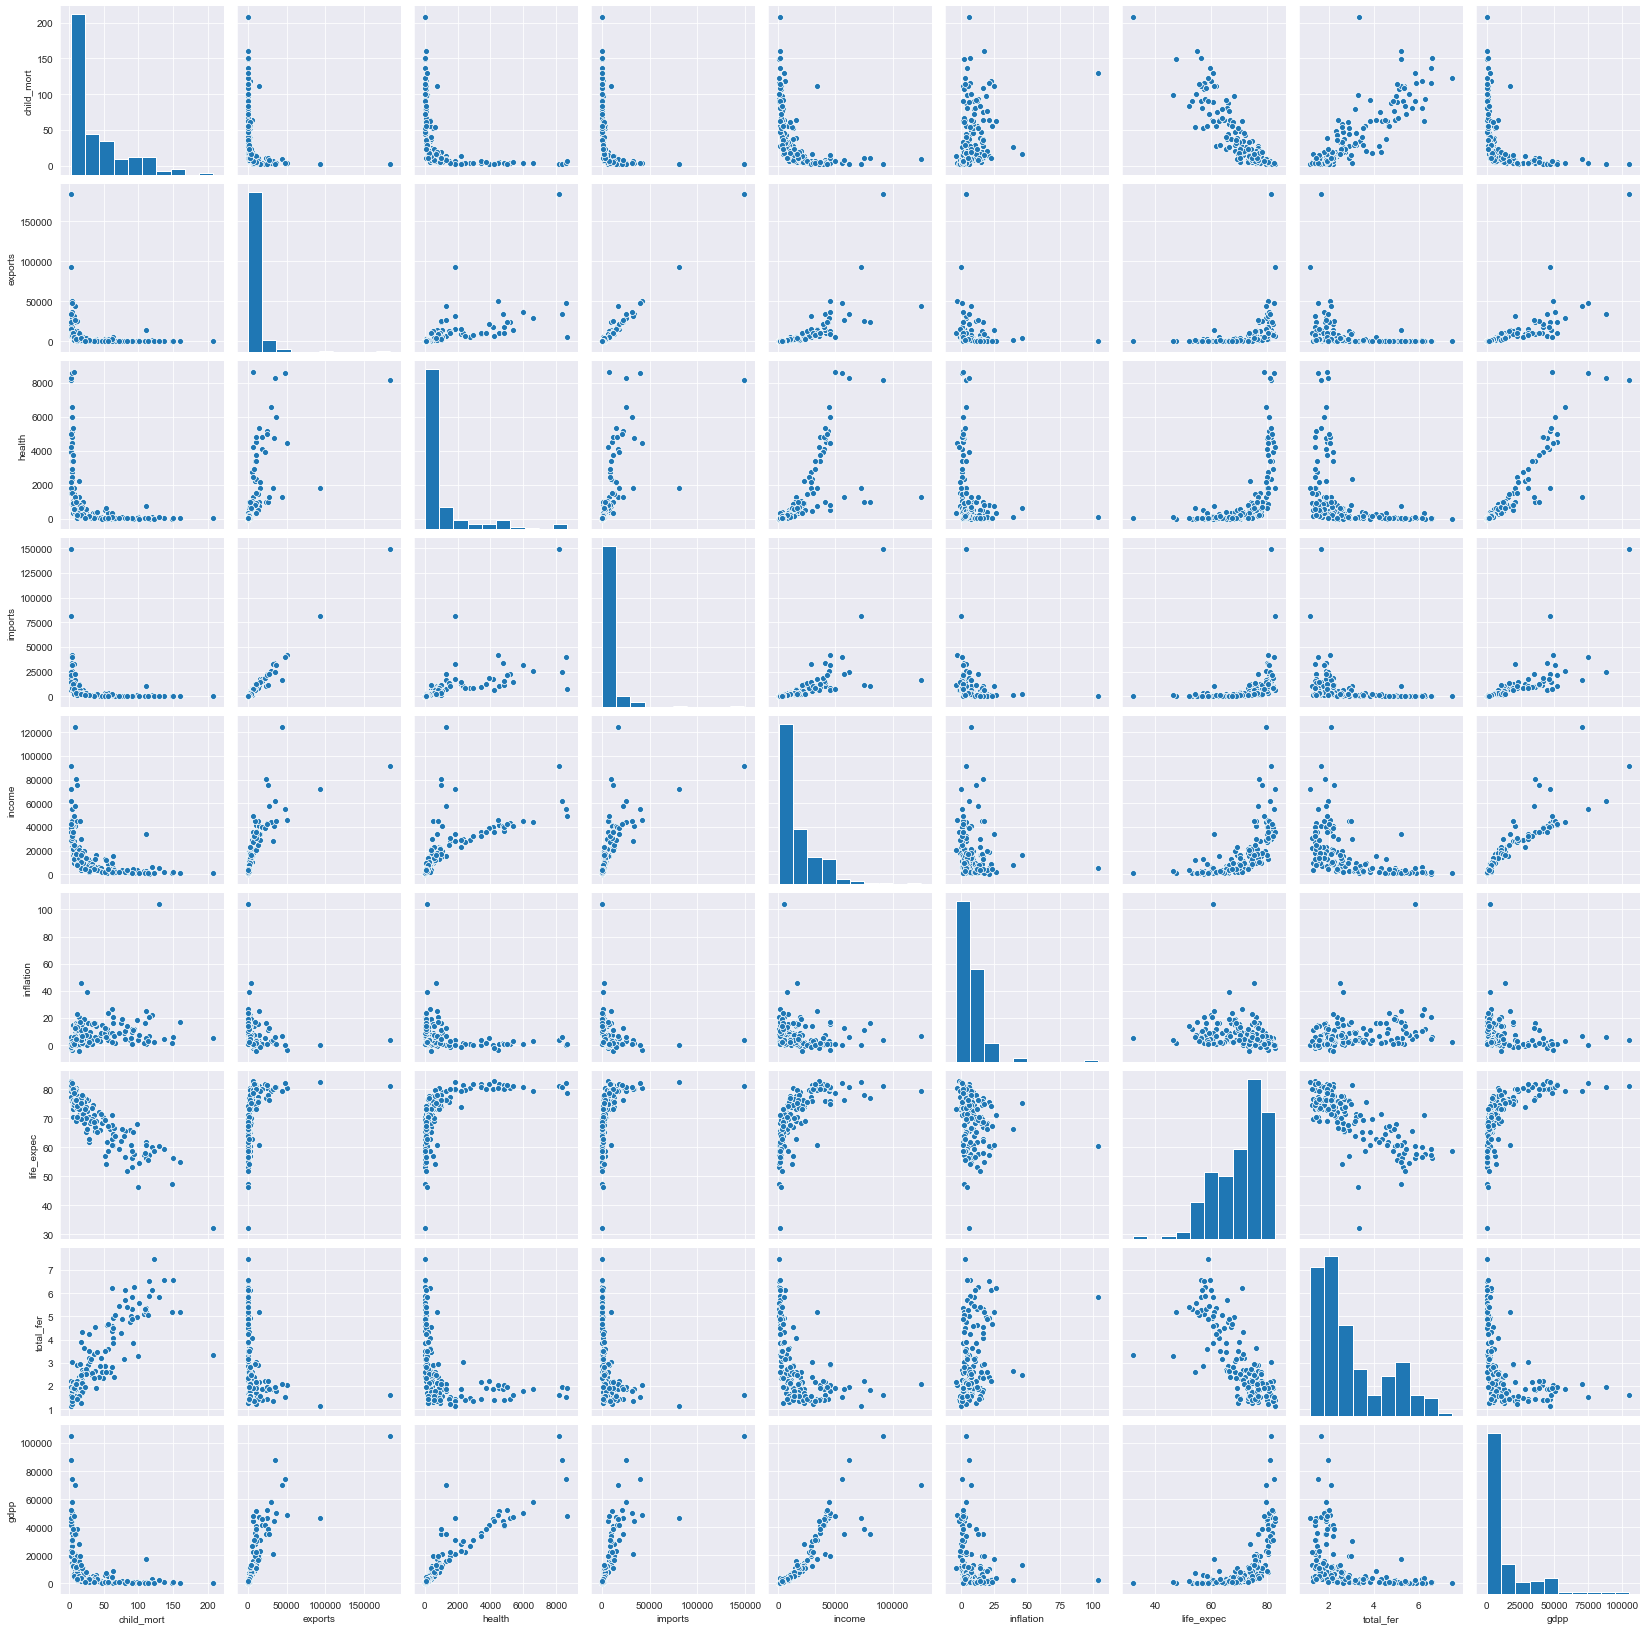

In [9]:
# Creating pairplot
sns.pairplot(country);

> With the use of this pairplot we gather certain insights:

- Income and gdpp have a positive relationship.
- Other than life expectancy, everything is right-skewed.

### Distplots (Univariate Analysis)

In [10]:
#Numerical Columns
num_cols = list(country.describe().columns)
num_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

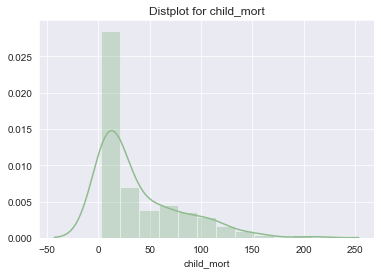

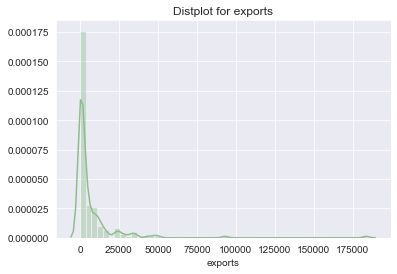

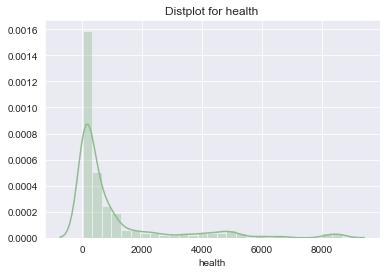

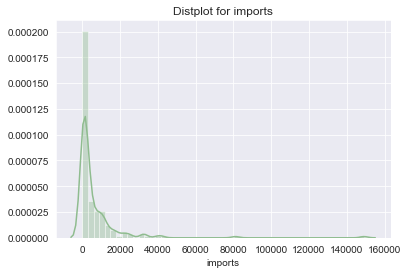

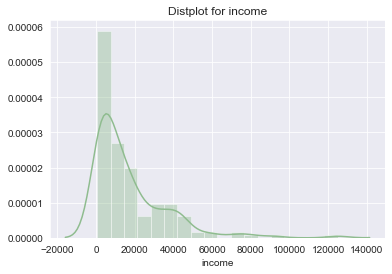

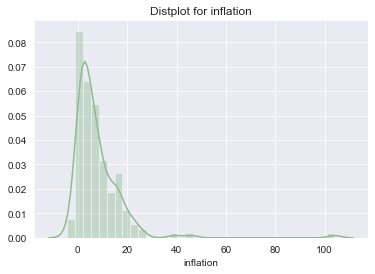

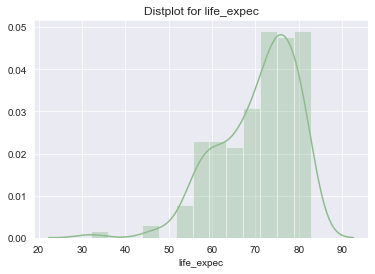

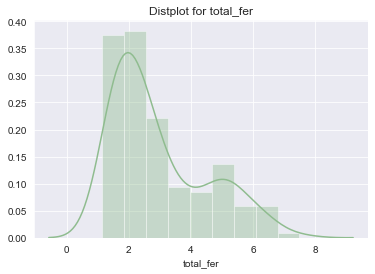

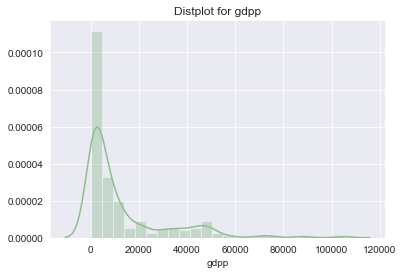

In [11]:
# Creating distplots
for col in num_cols:
    sns.distplot(country[col], color = 'darkseagreen')
    plt.title('Distplot for ' + col)
    plt.show()

### Insights:

- The child mortality rate(Death of children under 5 years of age per 1000 live births) distplot is skewed to the right. Most countries have low child mortality rate.
- The exports, imports and health distplots seems to be a normal distribution with a couple of outliers.
- The income, inflation and gdpp distplotsseems to be skewed to the right, with some outliers.
- The life expectancy distplot is skewed to the left. Most countries have a higher life expectancy.
- The total fertility distplot is left skewed.

### Bivariate Analysis

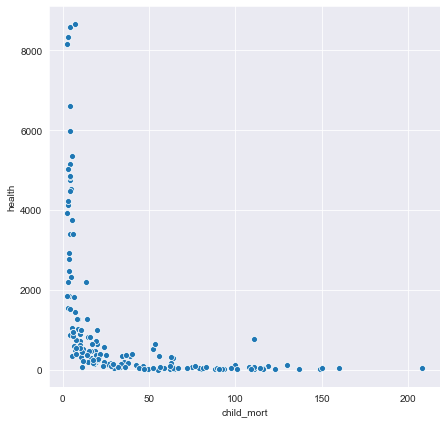

In [12]:
plt.figure(figsize=(7,7))
sns.scatterplot(x ='child_mort', y='health', data=country);

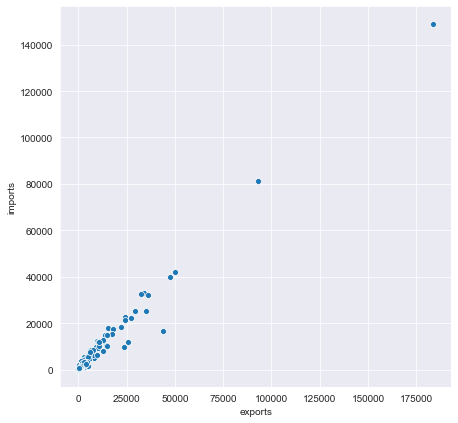

In [13]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'exports', y='imports', data=country);

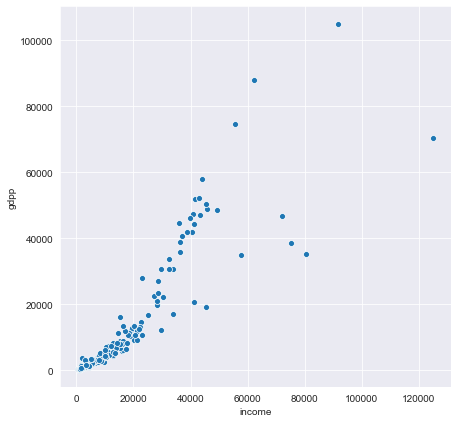

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'income', y='gdpp', data=country);

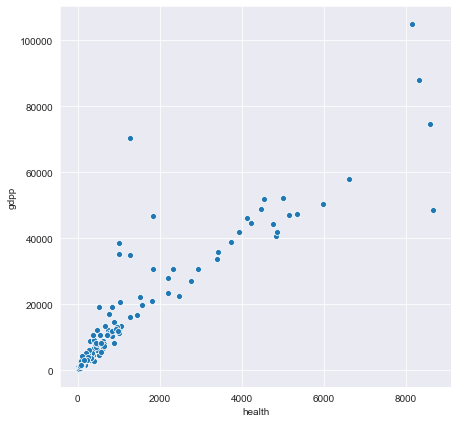

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'health', y='gdpp', data=country);

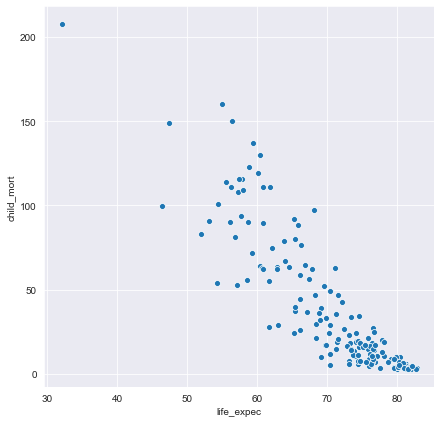

In [16]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'life_expec', y='child_mort', data=country);

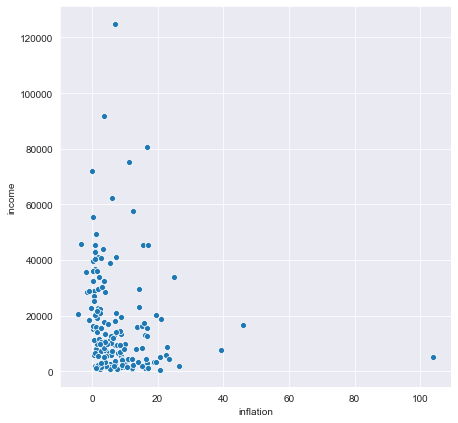

In [17]:
plt.figure(figsize=(7,7))
sns.scatterplot(x = 'inflation', y='income', data=country);

### Heatmap

In [18]:
# Corr of the entire data
country.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


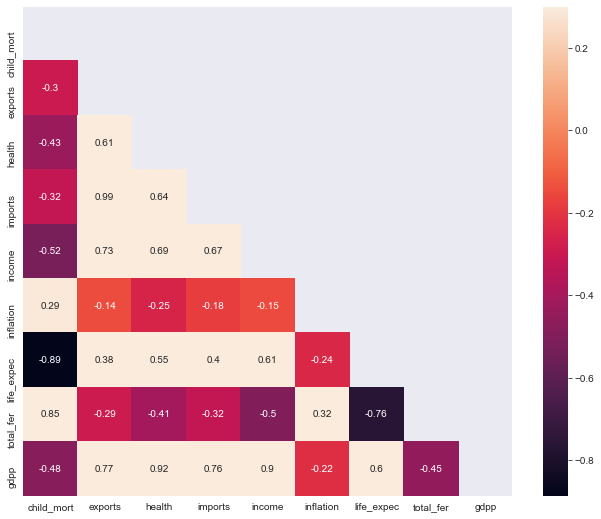

In [19]:
# Creating a mask for the repeated values on one half of the heatmap for the dataset

corr = country.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask = mask, vmax=.3, square = True, annot=True);

### Insights

- There is a high negative correlation between life expectancy and mortality rate, as it should be, of -0.89.
- There is a 0.85 correlation between child mortality and total fertility.
- There is a very high 0.99 correlation between imports and exports.
- A 0.73 correlation between income and exports.
- Another high correlation of 0.92 between health and gdpp.
- A negative correlation between life expectancy and total fertility of -0.76.

> All the high correlations can help us in clustering.

### Outlier Analysis

Plotting  child_mort


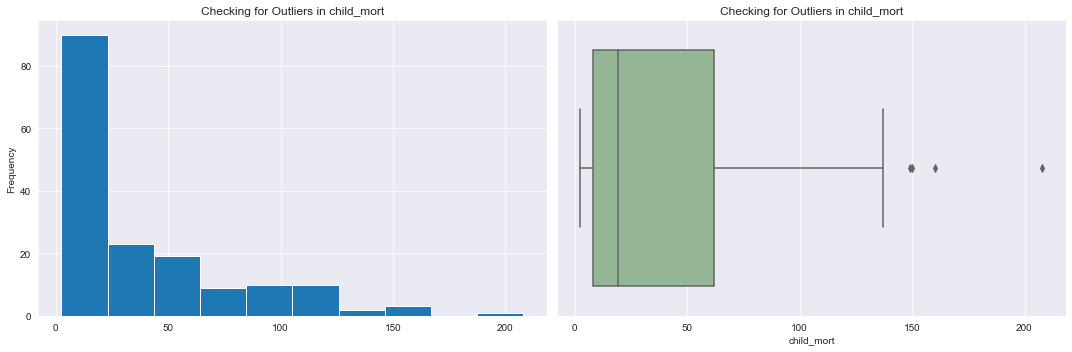

Plotting  exports


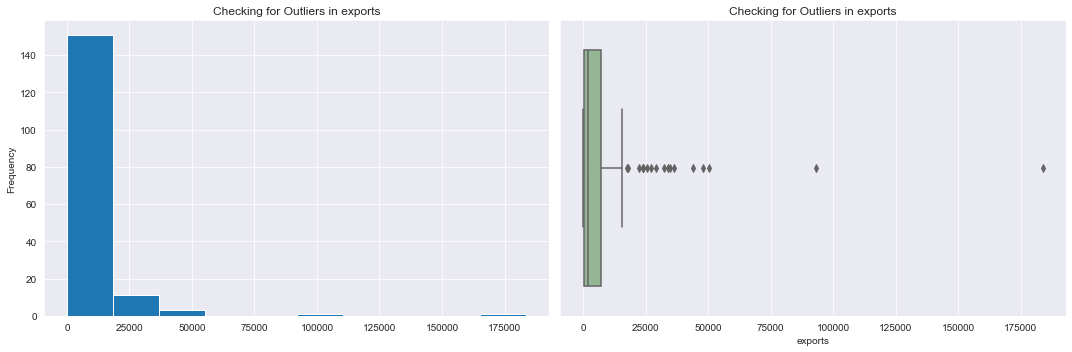

Plotting  health


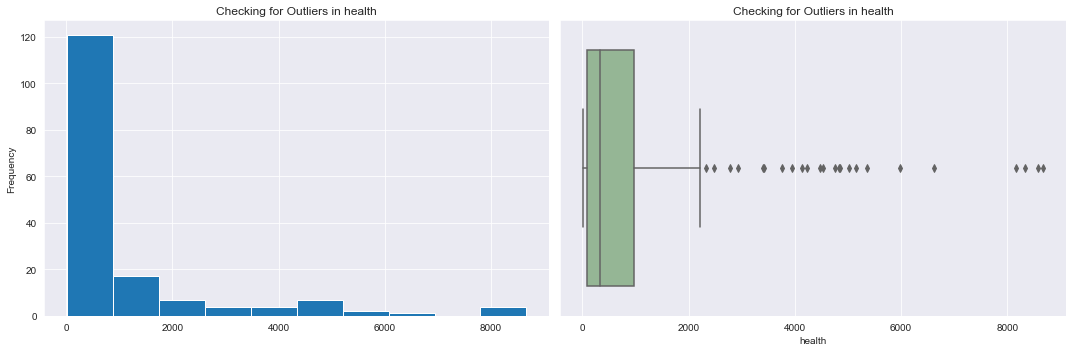

Plotting  imports


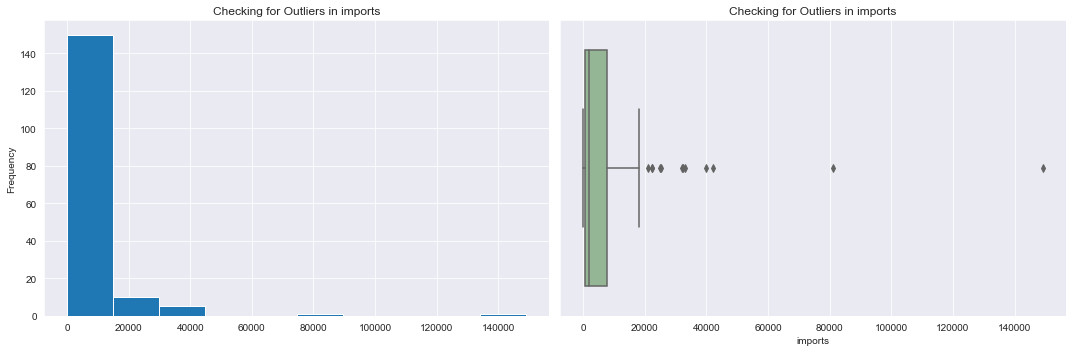

Plotting  income


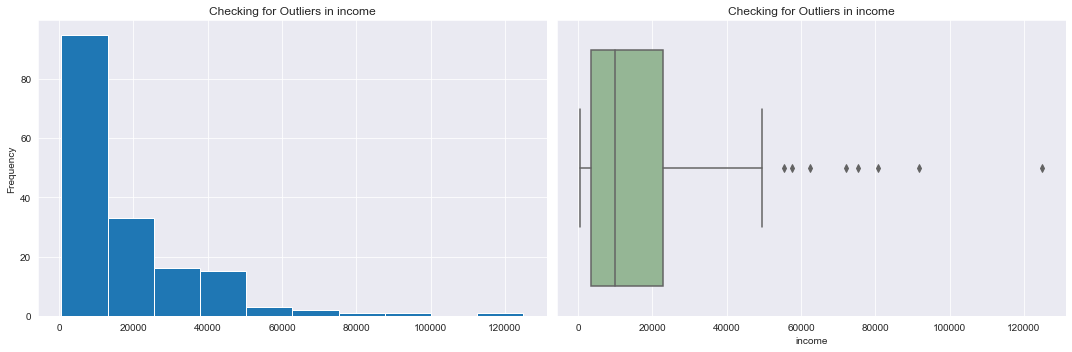

Plotting  inflation


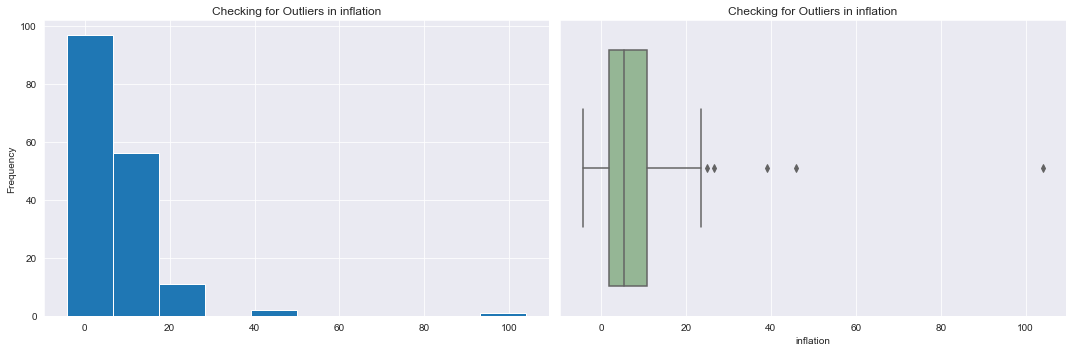

Plotting  life_expec


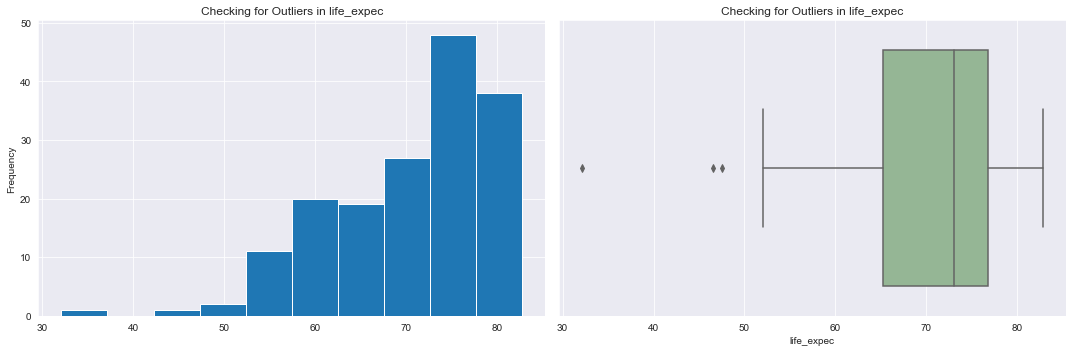

Plotting  total_fer


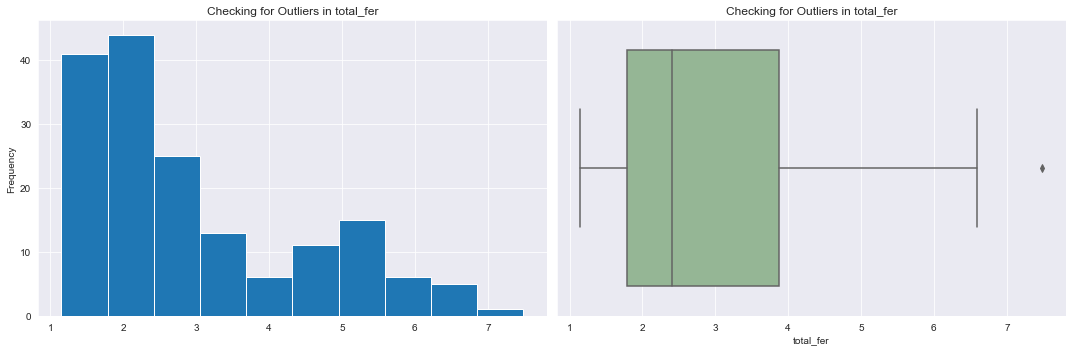

Plotting  gdpp


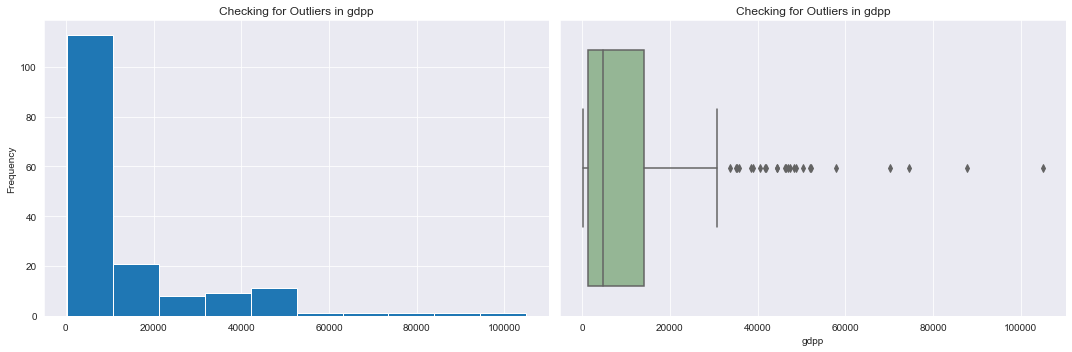

In [20]:
def data_info(df, column):
    
    fig = plt.figure(figsize=(15,5))
    
    ax1 = plt.subplot(121)
    df[column].plot.hist(ax=ax1);
    plt.title('Checking for Outliers in '+ column)
    
    ax2 = plt.subplot(122)
    sns.boxplot(x=df[column], color = 'darkseagreen', ax=ax2);
    plt.title('Checking for Outliers in '+ column)
    
    fig.tight_layout()
    
    plt.show()
    
    
for column in num_cols:
    print("Plotting ", column)
    data_info(country, column)

> There are total **167 countries** and **10 columns**. There are no null values present as every column has 167 values. Therefore, data is clean.

> For columns Child_mort, inflation and total_fer, we should not do anything to the upper range outliers, however, we can deal with the lower range outliers(Capping).

> For the rest of the columns we must not do anything to the lower range outliers, however, we can deal with the upper range outliers(Capping).

### Capping

In [21]:
#Calculating the lower quartiles
cq1 = country['child_mort'].quantile(0.1)
iq1 = country['inflation'].quantile(0.1)
fq1 = country['total_fer'].quantile(0.1)

In [22]:
#Dealing with the lower range outliers
country['child_mort'][country['child_mort']<=cq1] = cq1
country['inflation'][country['inflation']<=iq1] = iq1
country['total_fer'][country['total_fer']<=fq1] = fq1

In [23]:
# Calculating the upper quartiles
gq1 = country['gdpp'].quantile(0.9)
Iq1 = country['income'].quantile(0.9)
imq1 = country['imports'].quantile(0.9)
hq1 = country['health'].quantile(0.9)
exq1 = country['exports'].quantile(0.9)

In [24]:
#Dealing with the upper quartiles
country['gdpp'][country['gdpp']>=gq1] = gq1
country['income'][country['income']>=Iq1] = Iq1
country['imports'][country['imports']>=imq1] = imq1
country['health'][country['health']>=hq1] = hq1
country['exports'][country['exports']>=exq1] = exq1

Plotting  child_mort


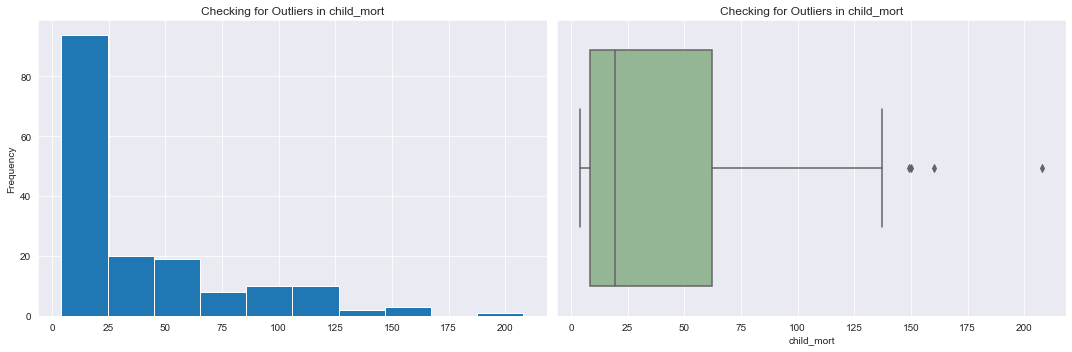

Plotting  exports


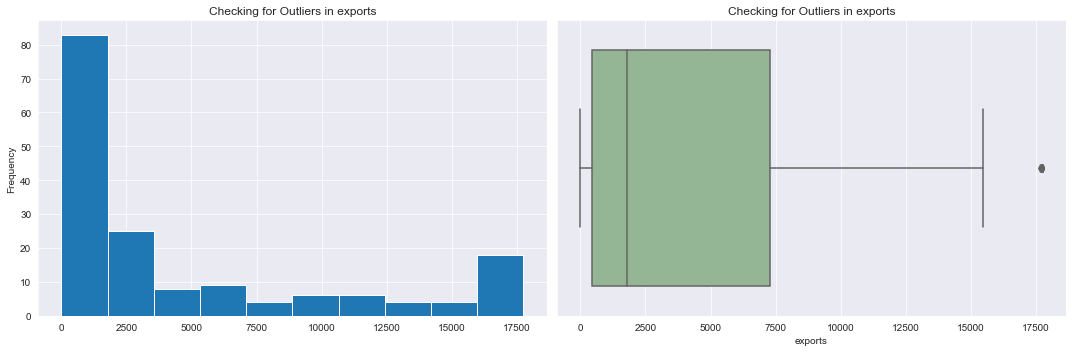

Plotting  health


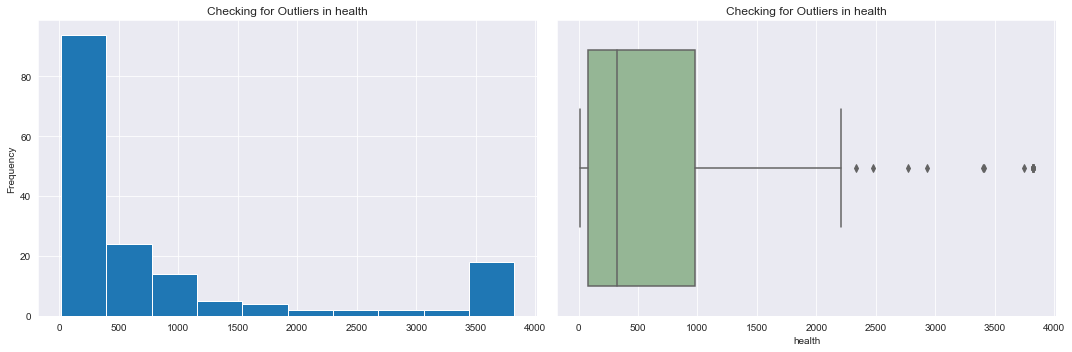

Plotting  imports


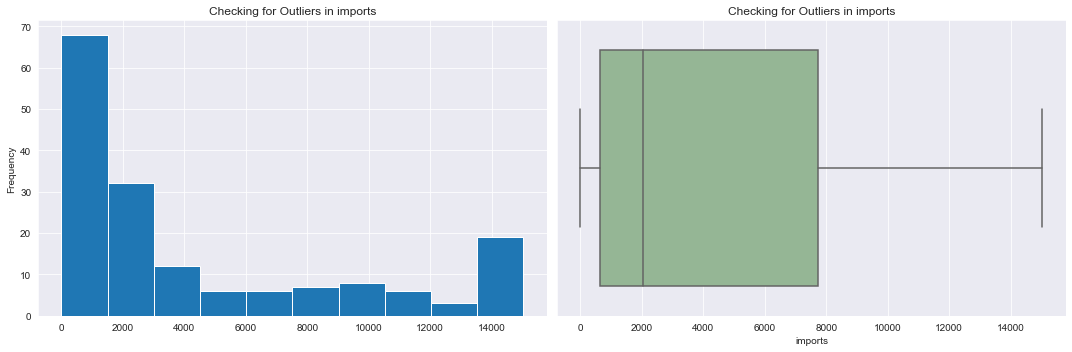

Plotting  income


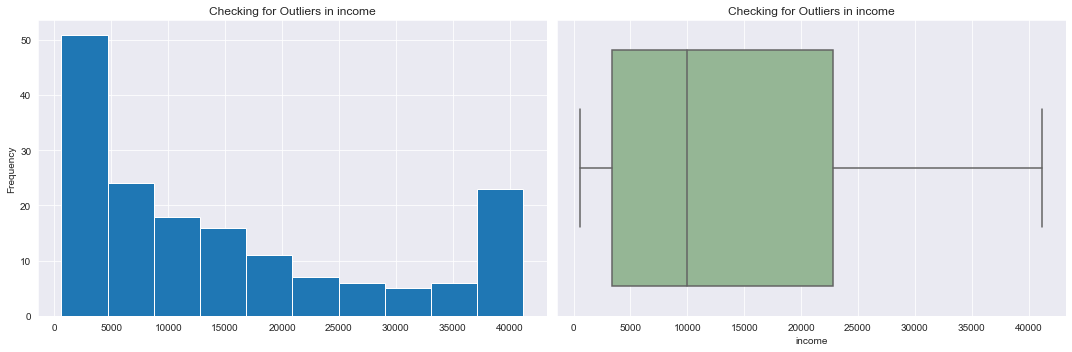

Plotting  inflation


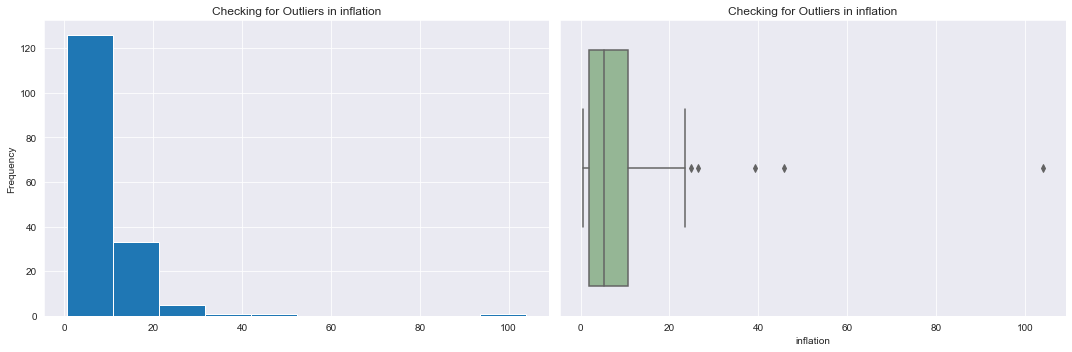

Plotting  life_expec


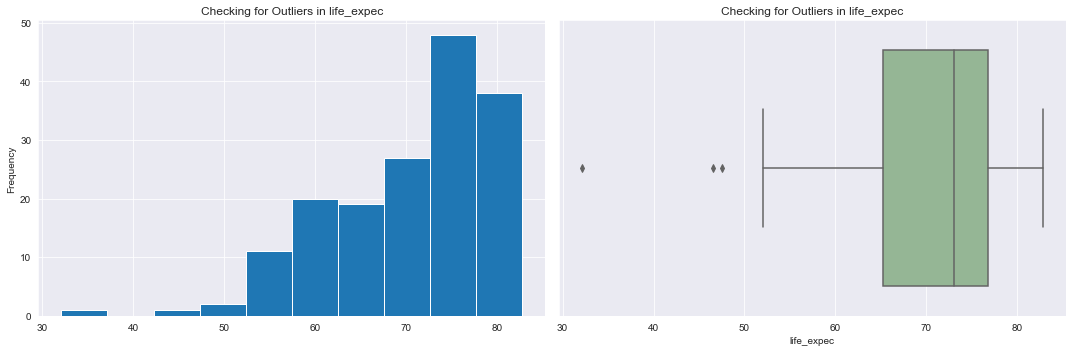

Plotting  total_fer


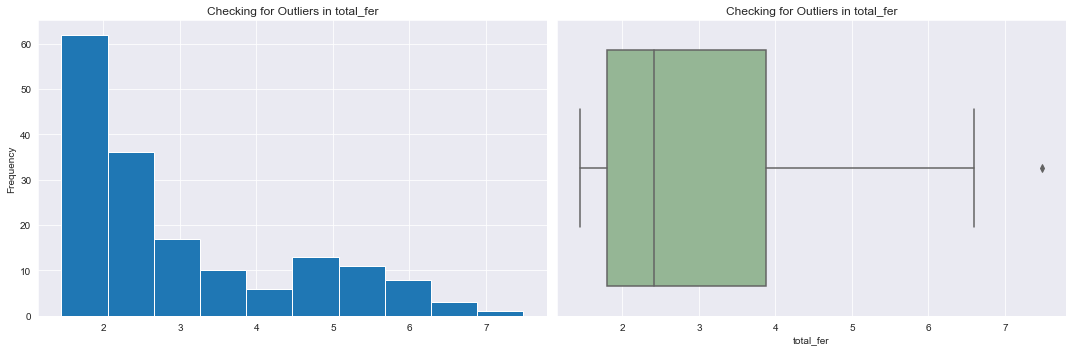

Plotting  gdpp


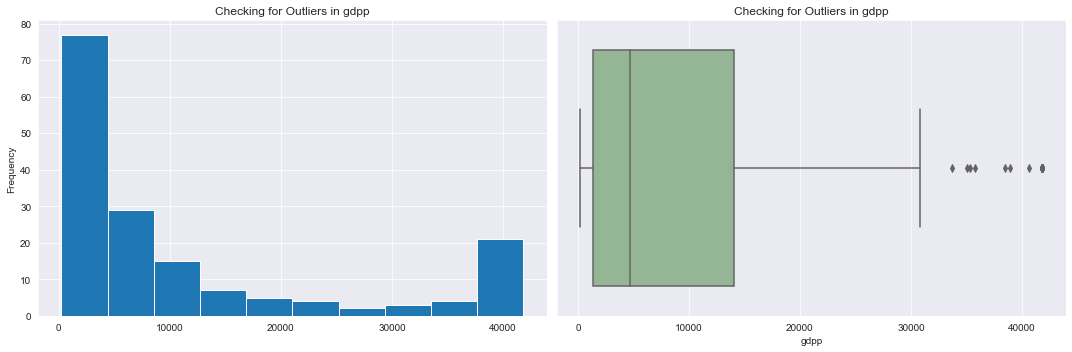

In [25]:
#Checking for outliers
for column in num_cols:
    print("Plotting ", column)
    data_info(country, column)

## Check the Cluster Tendancy: Hopkin's Test

In [26]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
# How different is the data from randomly scattered data
hopkins(country.drop('country', axis=1))

0.9038984136779591

>Hopkin's test shows us that our data is 88% different from randomly scattered data. The higher the value of dissimilarity, the more apt is our data for clustering.

### Scaling

In [28]:
# Scale
from sklearn.preprocessing import StandardScaler

In [29]:
#Using fit transform
ss = StandardScaler()
country1 = ss.fit_transform(country.drop('country', axis=1))

In [30]:
country1

array([[ 1.29174669, -0.79728596, -0.67693345, ..., -1.61909203,
         1.9095927 , -0.78681132],
       [-0.54170215, -0.61163615, -0.49035208, ...,  0.64786643,
        -0.87271626, -0.53130418],
       [-0.27515456, -0.51498038, -0.55798462, ...,  0.67042323,
        -0.04536299, -0.50457598],
       ...,
       [-0.37479852, -0.64604414, -0.63756038, ...,  0.28695762,
        -0.67255014, -0.73212687],
       [ 0.44726414, -0.7397633 , -0.65551525, ..., -0.34463279,
         1.14228927, -0.73212687],
       [ 1.11487866, -0.71468976, -0.64054103, ..., -2.09278484,
         1.62936014, -0.72129111]])

In [31]:
#Converting data into a dataframe
country1 = pd.DataFrame(country1)

In [32]:
#Looking at the data
country1.head()

,0,1,2,3,4,5,6,7,8
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811
1,-0.541702,-0.611636,-0.490352,-0.493824,-0.386326,-0.326628,0.647866,-0.872716,-0.531304
2,-0.275155,-0.514980,-0.557985,-0.611211,-0.169272,0.785281,0.670423,-0.045363,-0.504576
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758
4,-0.698641,0.138833,-0.104136,0.545147,0.283837,-0.618731,0.704258,-0.552450,0.054549


In [33]:
#Renaming columns
country1.columns = list(country.describe().columns)

In [34]:
#Looking at the data
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811
1,-0.541702,-0.611636,-0.490352,-0.493824,-0.386326,-0.326628,0.647866,-0.872716,-0.531304
2,-0.275155,-0.514980,-0.557985,-0.611211,-0.169272,0.785281,0.670423,-0.045363,-0.504576
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758
4,-0.698641,0.138833,-0.104136,0.545147,0.283837,-0.618731,0.704258,-0.552450,0.054549


In [35]:
country1.shape

(167, 9)

## KMeans Clustering

### Find the best value of k: SSD, Silhouette Score

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [36]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(country1)
    ss.append([k, silhouette_score(country1, kmean.labels_)])
    
ss

[[2, 0.5034491500862595],
 [3, 0.4525160587161715],
 [4, 0.4552665198529666],
 [5, 0.40187638949054594],
 [6, 0.3223140794748245],
 [7, 0.27240898259527907],
 [8, 0.274894434980226],
 [9, 0.2976841353938342],
 [10, 0.31082284896639534]]

In [37]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.503449
1,3,0.452516
2,4,0.455267
3,5,0.401876
4,6,0.322314
5,7,0.272409
6,8,0.274894
7,9,0.297684
8,10,0.310823


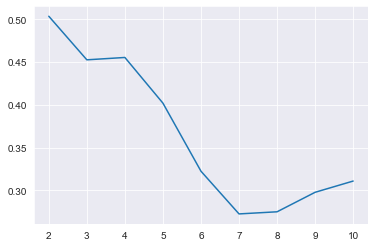

In [38]:
plt.plot(sil[0], sil[1]);

> As we can see there is a steep in the graph after 5 till 6, after which there isn't much change, therefore we must choose k = 6

### Using value of k, performing final KMeans Analysis

In [39]:
#Using KMeans fit
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(country1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [40]:
# Having a look at the cluster centers
kmeans.cluster_centers_

array([[-0.53983383, -0.32812442, -0.32561603, -0.28757082, -0.13958215,
        -0.04793889,  0.44908463, -0.61462112, -0.32142589],
       [-0.76376583,  1.34621129,  0.55851941,  1.35319991,  1.21796613,
        -0.26728199,  0.81006057, -0.71817531,  0.9652342 ],
       [ 1.8366995 , -0.76213117, -0.67332725, -0.8231467 , -0.98605803,
         0.0312328 , -1.66420563,  1.7067577 , -0.77085241],
       [ 0.36523167, -0.59924251, -0.58247688, -0.64247573, -0.69296466,
         0.2440156 , -0.56180757,  0.49462   , -0.63071426],
       [-0.83980366,  1.69673957,  2.33329924,  1.74771353,  1.78209052,
        -0.57998102,  1.17795124, -0.77905123,  2.13239997],
       [ 2.28320408, -0.70629388, -0.61400669, -0.81009228, -0.73565821,
         9.20361033, -1.13412081,  1.9229371 , -0.65844372]])

In [41]:
#Having a look at the labels
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 4, 4, 0, 1, 1, 3, 0, 0, 4, 0, 2, 0, 3, 0, 3,
       0, 1, 0, 2, 2, 3, 2, 4, 0, 2, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 1, 1,
       4, 0, 0, 3, 0, 3, 3, 1, 3, 4, 4, 3, 2, 0, 4, 3, 1, 0, 3, 2, 2, 3,
       2, 1, 4, 3, 3, 0, 3, 4, 1, 4, 0, 4, 0, 0, 3, 3, 1, 3, 3, 0, 0, 2,
       2, 0, 0, 4, 0, 3, 2, 0, 0, 2, 1, 3, 0, 3, 0, 3, 0, 0, 2, 3, 3, 3,
       4, 4, 2, 5, 4, 1, 3, 0, 0, 0, 3, 0, 1, 1, 0, 0, 3, 3, 1, 3, 0, 1,
       2, 4, 1, 1, 3, 3, 1, 1, 0, 0, 3, 0, 4, 4, 3, 2, 0, 3, 2, 3, 0, 0,
       3, 2, 0, 1, 4, 4, 0, 3, 3, 0, 0, 3, 2])

In [42]:
# Now we will assign labels to our original country dataset
country['labels'] = kmeans.labels_

In [43]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [44]:
country.labels.value_counts()

0    56
3    43
2    25
4    21
1    21
5     1
Name: labels, dtype: int64

## Visualizing data using scatter plot

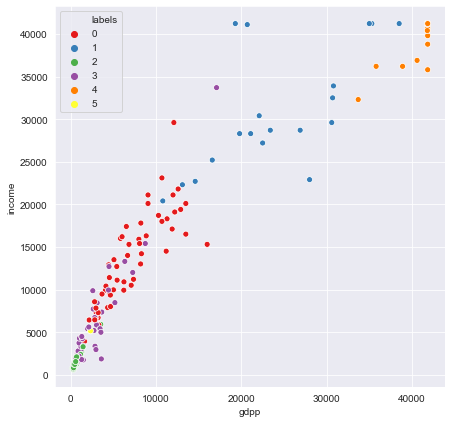

In [45]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='gdpp', y='income', hue = 'labels', data=country, palette='Set1');

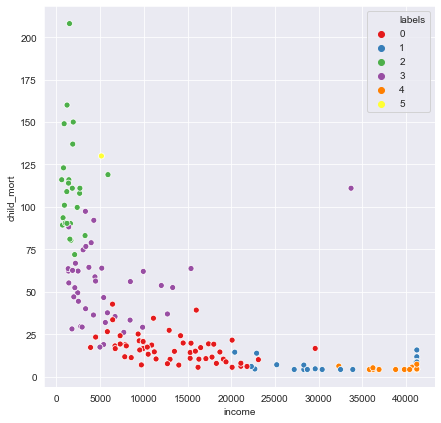

In [46]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='income', y='child_mort', hue='labels', data=country, palette='Set1');

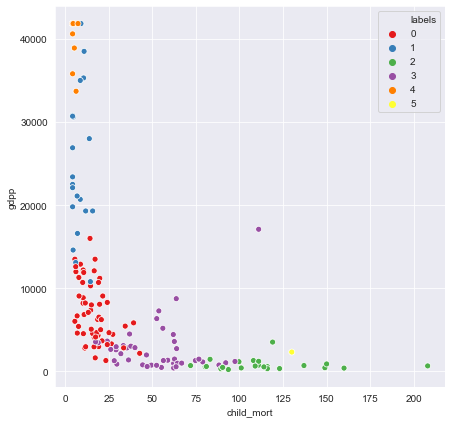

In [47]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='child_mort', y = 'gdpp', hue='labels', data=country, palette='Set1');

### Cluster Profiling

We are required to find one such cluster that has a HIGH Child_mort, LOW Income and LOW gdpp.

In [48]:
#Extracting mean of clusters wrt child_mort, income and gdpp
country[['child_mort','income','gdpp','labels']].groupby('labels').mean()

,child_mort,income,gdpp
labels,,,
0,16.675000,13306.250000,6995.357143
1,7.685714,31881.904762,24806.666667
2,112.076000,1723.720000,773.920000
3,53.006977,5734.186047,2713.860465
4,4.633333,39600.952381,40963.809524
5,130.000000,5150.000000,2330.000000


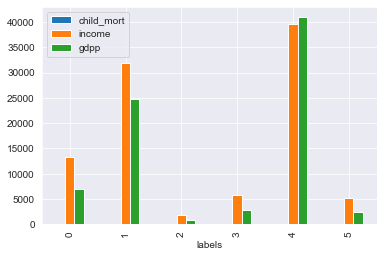

In [49]:
# Visulaizing the same
country[['child_mort','income','gdpp','labels']].groupby('labels').mean().plot(kind='bar');

> With the help of KMeans clustering we can see that we have 6 clusters and cluster label 2 seems to meet our requirements.

> As we require the cluster with the countries that are in the direst of need, we required the lowest income, lowest gdpp and highest child_mort rate.

> Cluster label 5 does have the highest child_mort, however, its income and gdpp are higher than cluster label 2. There isn't much difference between the child_mort of cluster label 2 and 5.

## Identifying the countries of the chosen cluster

In [50]:
#Looking at all the countries in cluster label 2
c1 = country[country['labels']==2]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2
40,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.390,56.3,5.27,1220,2


In [51]:
# Sorting data in ascending wrt gdpp and income
c1.sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.97,55.6,5.05,547,2


In [52]:
top_10 = c1.sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]).head(10)
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Angola
7,"Congo, Dem. Rep."
8,Burkina Faso
9,Guinea-Bissau


> According to KMeans Clustering method, above are the 10 countries that are in the direst of need.

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Niger
- Angola
- Congo, Dem.Rep.
- Burkina Faso
- Guinea-Bissau

## Heirarchical Clustering

- Single Linkage(Dendrogram)
- Complete Linkage(Dendrogram)
- Use one of the final clusters
- Visualization
- Perform Cluster Profiling: Child_mort, Income and gdpp

In [53]:
# Hierarchial Clustering libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [54]:
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811
1,-0.541702,-0.611636,-0.490352,-0.493824,-0.386326,-0.326628,0.647866,-0.872716,-0.531304
2,-0.275155,-0.514980,-0.557985,-0.611211,-0.169272,0.785281,0.670423,-0.045363,-0.504576
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758
4,-0.698641,0.138833,-0.104136,0.545147,0.283837,-0.618731,0.704258,-0.552450,0.054549


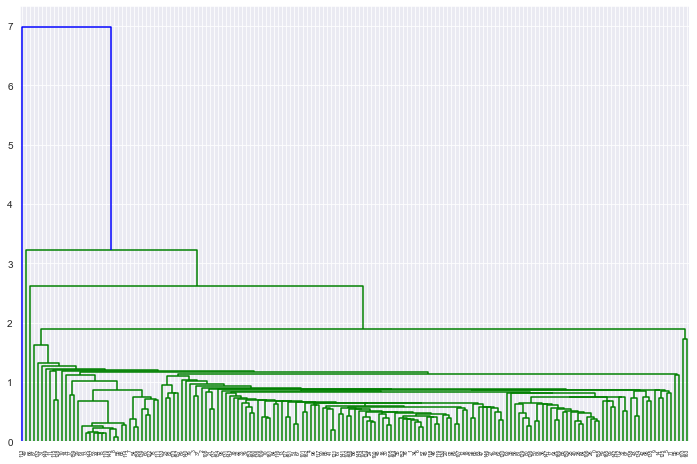

In [55]:
# Single Linkage

plt.figure(figsize=(12,8))
mergings = linkage(country1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show();

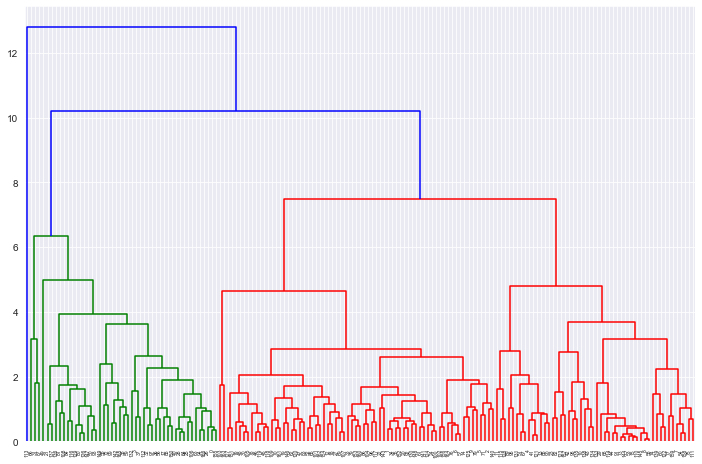

In [56]:
# complete linkage
plt.figure(figsize=(12,8))
mergings = linkage(country1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

I performed heirarchical clustering using both single linkage and complete linkage and found out that complete linkage seems to give us better understanding of the clusters we ought to choose.

I choose to cut the tree at 8 with 3 clusters as it seems to be the best out of the rest, going further down, I'll be having too many clusters, going up will be too vague.

In [57]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [58]:
# assign cluster labels
country1['cluster_labels'] = cluster_labels
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811,0
1,-0.541702,-0.611636,-0.490352,-0.493824,-0.386326,-0.326628,0.647866,-0.872716,-0.531304,1
2,-0.275155,-0.514980,-0.557985,-0.611211,-0.169272,0.785281,0.670423,-0.045363,-0.504576,1
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758,0
4,-0.698641,0.138833,-0.104136,0.545147,0.283837,-0.618731,0.704258,-0.552450,0.054549,1


In [59]:
country1['country'] = country['country']
country1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811,0,Afghanistan
1,-0.541702,-0.611636,-0.490352,-0.493824,-0.386326,-0.326628,0.647866,-0.872716,-0.531304,1,Albania
2,-0.275155,-0.514980,-0.557985,-0.611211,-0.169272,0.785281,0.670423,-0.045363,-0.504576,1,Algeria
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758,0,Angola
4,-0.698641,0.138833,-0.104136,0.545147,0.283837,-0.618731,0.704258,-0.552450,0.054549,1,Antigua and Barbuda


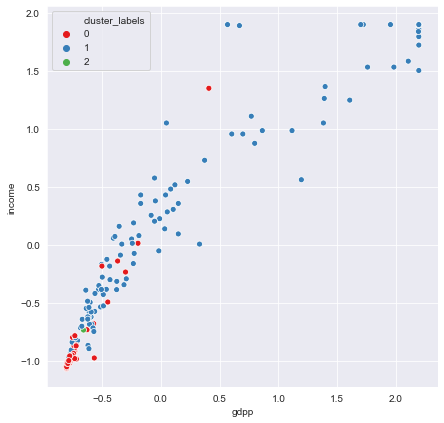

In [60]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='gdpp', y='income', hue = 'cluster_labels', data=country1, palette='Set1');

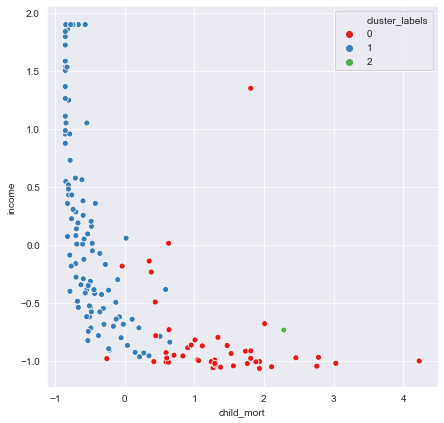

In [61]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='child_mort', y='income', hue = 'cluster_labels', data=country1, palette='Set1');

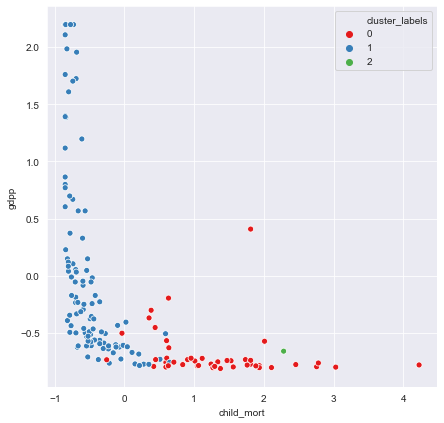

In [62]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='child_mort', y='gdpp', hue = 'cluster_labels', data=country1, palette='Set1');

### Cluster Profiling

In [63]:
country1['cluster_labels'].value_counts()

1    119
0     47
2      1
Name: cluster_labels, dtype: int64

In [64]:
#Extracting mean of clusters wrt child_mort, income and gdpp
country1[['child_mort','income','gdpp','cluster_labels']].groupby('cluster_labels').mean()

,child_mort,income,gdpp
cluster_labels,,,
0,1.306534,-0.829152,-0.689488
1,-0.535213,0.333662,0.277852
2,2.283204,-0.735658,-0.658444


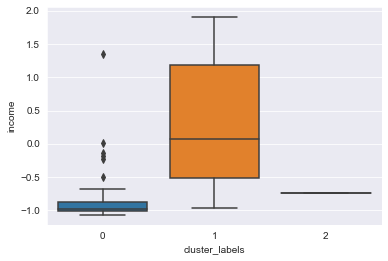

In [65]:
# plots for income

sns.boxplot(x='cluster_labels', y='income', data=country1);

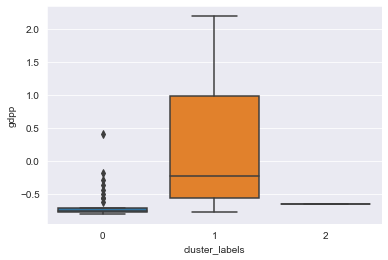

In [66]:
# plots for gdpp
sns.boxplot(x='cluster_labels', y='gdpp', data=country1);

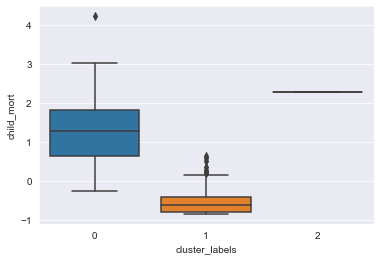

In [67]:
# plots for child_mort
sns.boxplot(x='cluster_labels', y='child_mort', data=country1);

In [68]:
#Looking at all the countries in cluster label 0
h1 = country1[country1['cluster_labels']==0]
h1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,1.291747,-0.797286,-0.676933,-0.841497,-0.994369,0.147442,-1.619092,1.909593,-0.786811,0,Afghanistan
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758,0,Angola
17,1.809895,-0.775976,-0.685883,-0.834766,-0.979022,-0.671884,-0.987502,1.602671,-0.772002,0,Benin
21,0.352602,-0.335112,-0.276377,-0.240018,-0.140039,0.097641,-1.517586,-0.052035,-0.368045,0,Botswana
25,1.934450,-0.787900,-0.679545,-0.857107,-1.007524,-0.104437,-1.427359,1.942954,-0.785222,0,Burkina Faso
26,1.376444,-0.803196,-0.689419,-0.873027,-1.056196,0.421349,-1.449916,2.203170,-0.810072,0,Burundi
28,1.735162,-0.757168,-0.656056,-0.820430,-0.917633,-0.573718,-1.495030,1.435866,-0.732127,0,Cameroon
31,2.756513,-0.797741,-0.696887,-0.867503,-1.047134,-0.564141,-2.600313,1.502588,-0.794541,0,Central African Republic
32,2.781424,-0.750478,-0.677993,-0.813135,-0.970983,-0.144661,-1.585257,2.423352,-0.761961,0,Chad
36,1.241925,-0.785092,-0.682908,-0.811661,-1.008985,-0.386006,-0.525087,1.195667,-0.771208,0,Comoros


In [69]:
# Sorting data in ascending wrt gdpp and income
h1.sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
66,4.226261,-0.789453,-0.673774,-0.805516,-1.002408,-0.234687,-4.337186,0.248214,-0.778937,0,Haiti
132,3.030534,-0.795288,-0.668387,-0.863612,-1.022871,0.890630,-1.754433,1.495916,-0.797936,0,Sierra Leone
32,2.781424,-0.750478,-0.677993,-0.813135,-0.970983,-0.144661,-1.585257,2.423352,-0.761961,0,Chad
31,2.756513,-0.797741,-0.696887,-0.867503,-1.047134,-0.564141,-2.600313,1.502588,-0.794541,0,Central African Republic
97,2.457581,-0.779209,-0.682432,-0.841455,-0.975368,-0.338120,-1.246905,2.396664,-0.775614,0,Mali
112,2.108827,-0.793546,-0.696717,-0.856974,-1.052542,-0.512425,-1.325854,3.023851,-0.801620,0,Niger
3,2.009183,-0.432103,-0.628477,-0.588439,-0.680847,1.388643,-1.179234,2.136448,-0.571758,0,Angola
37,1.934450,-0.783323,-0.689730,-0.858014,-1.067524,1.235408,-1.472473,2.389991,-0.802632,0,"Congo, Dem. Rep."
25,1.934450,-0.787900,-0.679545,-0.857107,-1.007524,-0.104437,-1.427359,1.942954,-0.785222,0,Burkina Faso
64,1.884628,-0.792823,-0.673154,-0.852641,-1.010447,-0.472201,-1.686762,1.395833,-0.787245,0,Guinea-Bissau


In [70]:
Top_10 = h1.sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]).head(10)
Top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Niger
6,Angola
7,"Congo, Dem. Rep."
8,Burkina Faso
9,Guinea-Bissau


### Top 10 countries using heirarchical clustering

- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Niger
- Angola
- Congo, Dem. Rep.
- Bukina Faso
- Guinea-Bissau

## Result

From both KMeans clustering and Heirarchical clustering methods we obtain the same 10 countries.


## Conclusion

I will report back to the CEO 5 countries from this list that are in the direst of need.